# Surface quality measurements using vedo in napari
This notebook shows how to visualize quantitatvie measurements on surface data in napari.

See also
* [vedo add_quality documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html#vedo.mesh.Mesh.addQuality)

In [1]:
import napari_process_points_and_surfaces as nppas

import napari
import numpy as np
import pandas as pd
from skimage.measure import label
from skimage.data import cells3d

In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

In [3]:
nuclei = cells3d()[:,1,60:120,30:80]
nuclei.shape

(60, 60, 50)

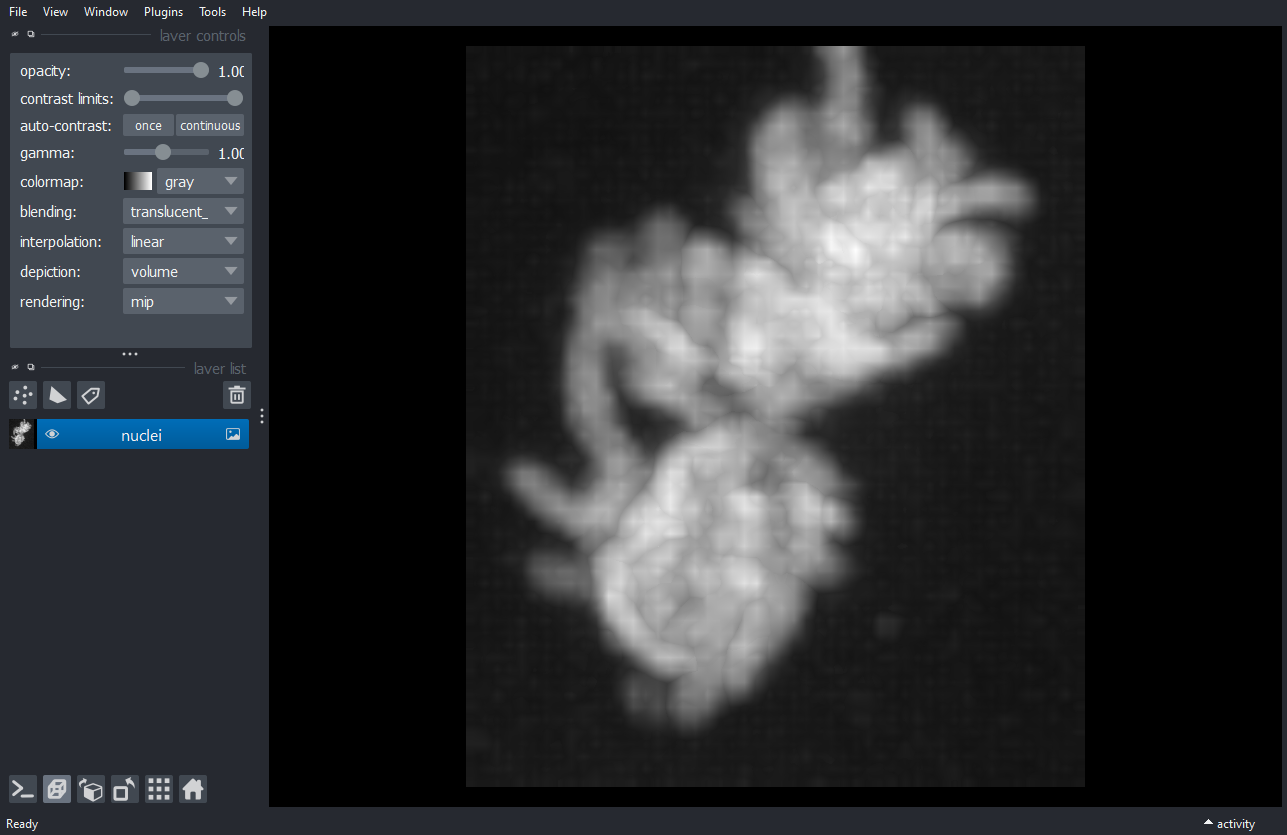

In [4]:
viewer.add_image(nuclei)

napari.utils.nbscreenshot(viewer)

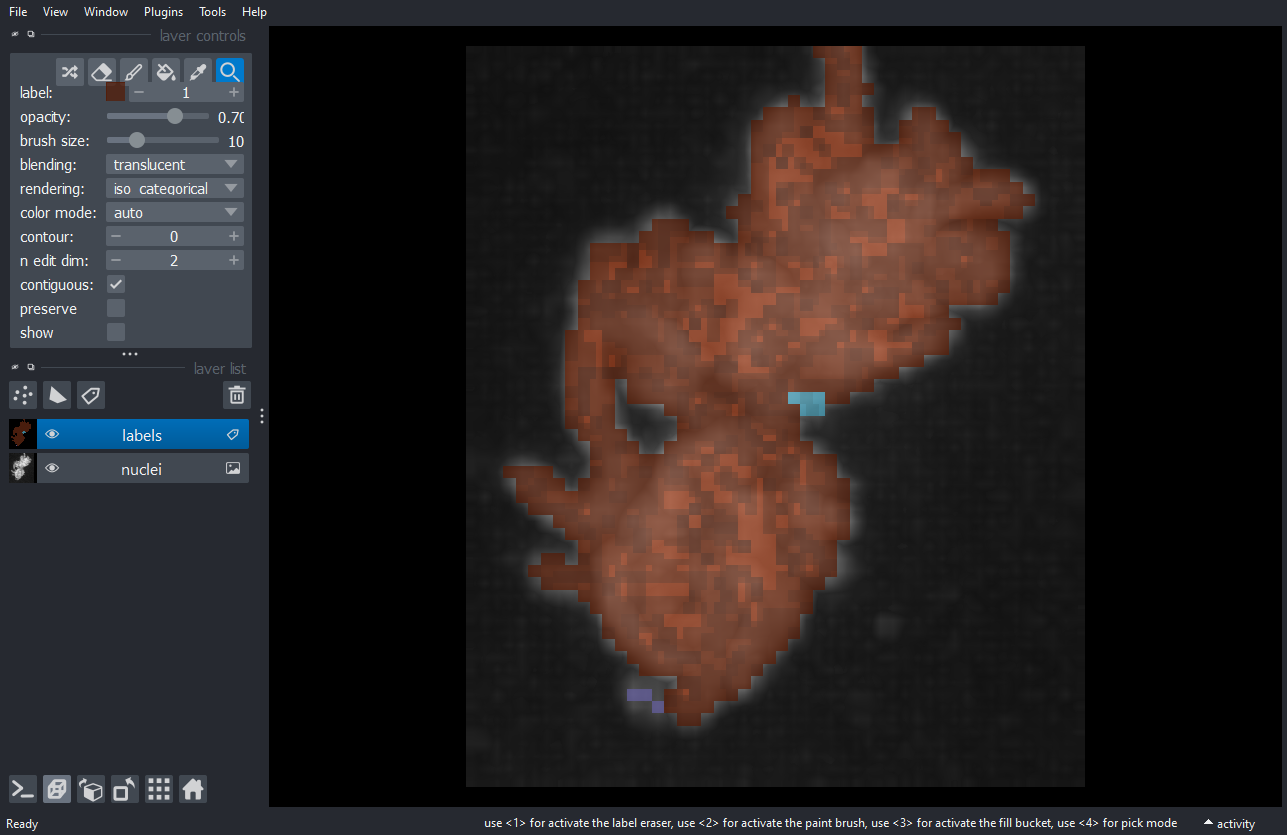

In [5]:
labels = label(nuclei>20000)

viewer.add_labels(labels)

napari.utils.nbscreenshot(viewer)

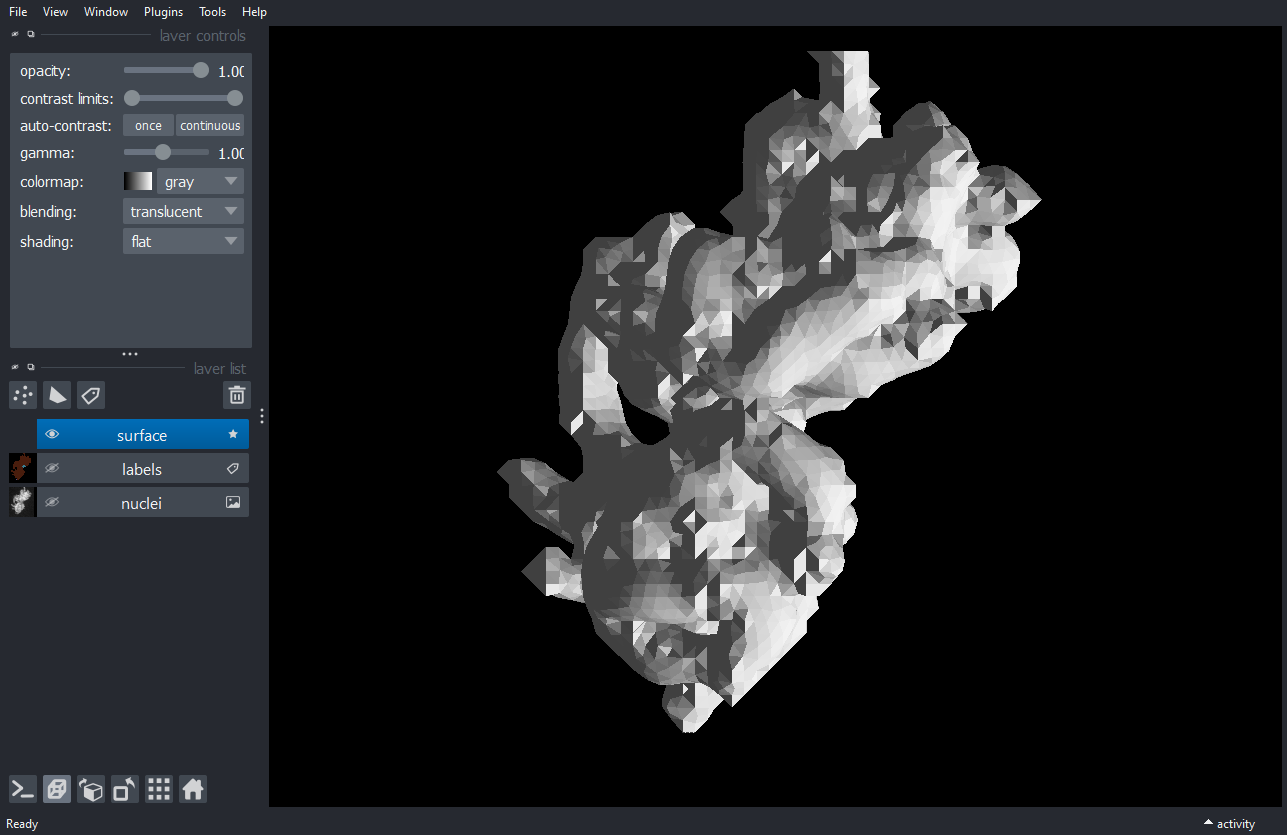

In [6]:
hide_all(viewer)

surface = nppas.smooth_surface(nppas.largest_label_to_surface(labels))

surface_layer = viewer.add_surface(surface, blending='translucent', shading='flat')
surface = surface_layer.data

napari.utils.nbscreenshot(viewer)

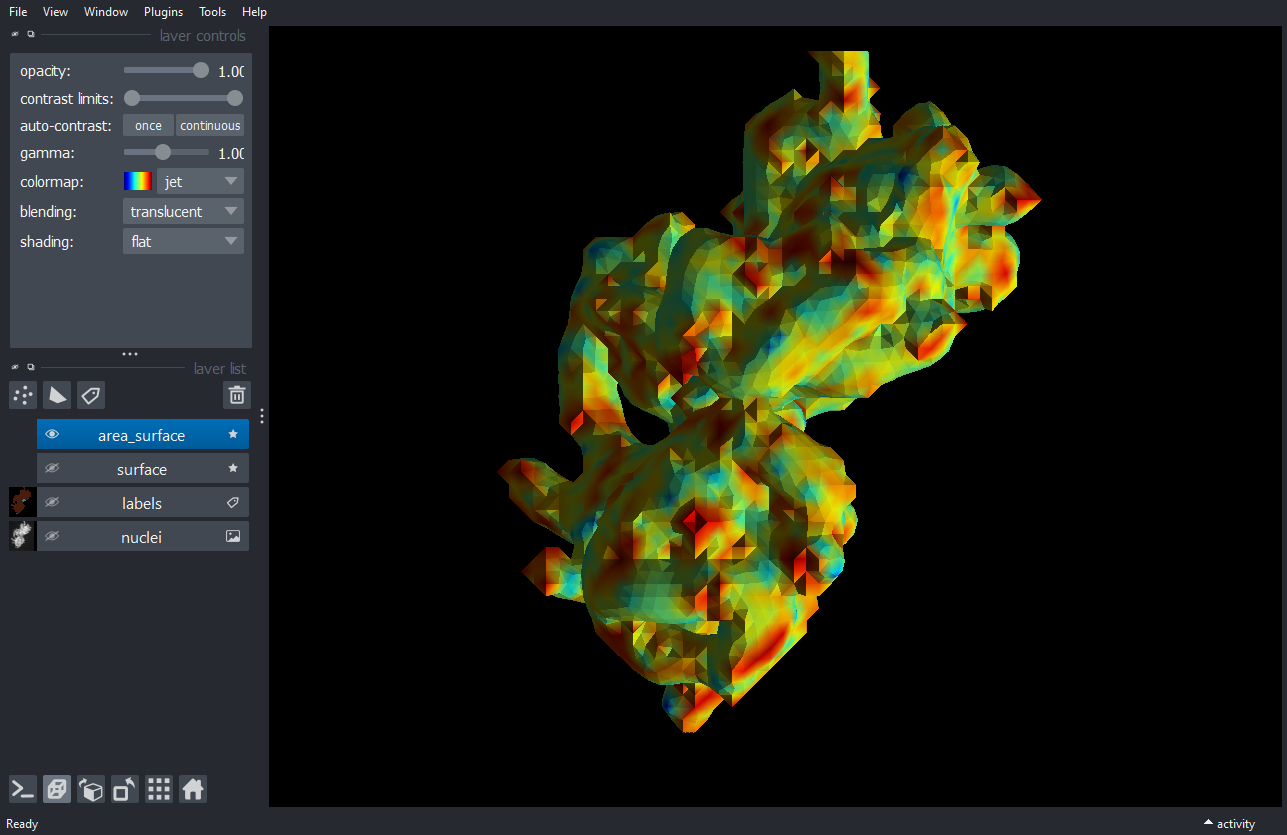

In [7]:
hide_all(viewer)

area_surface = nppas.add_quality(surface, quality_id=nppas.Quality.AREA)
viewer.add_surface(area_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

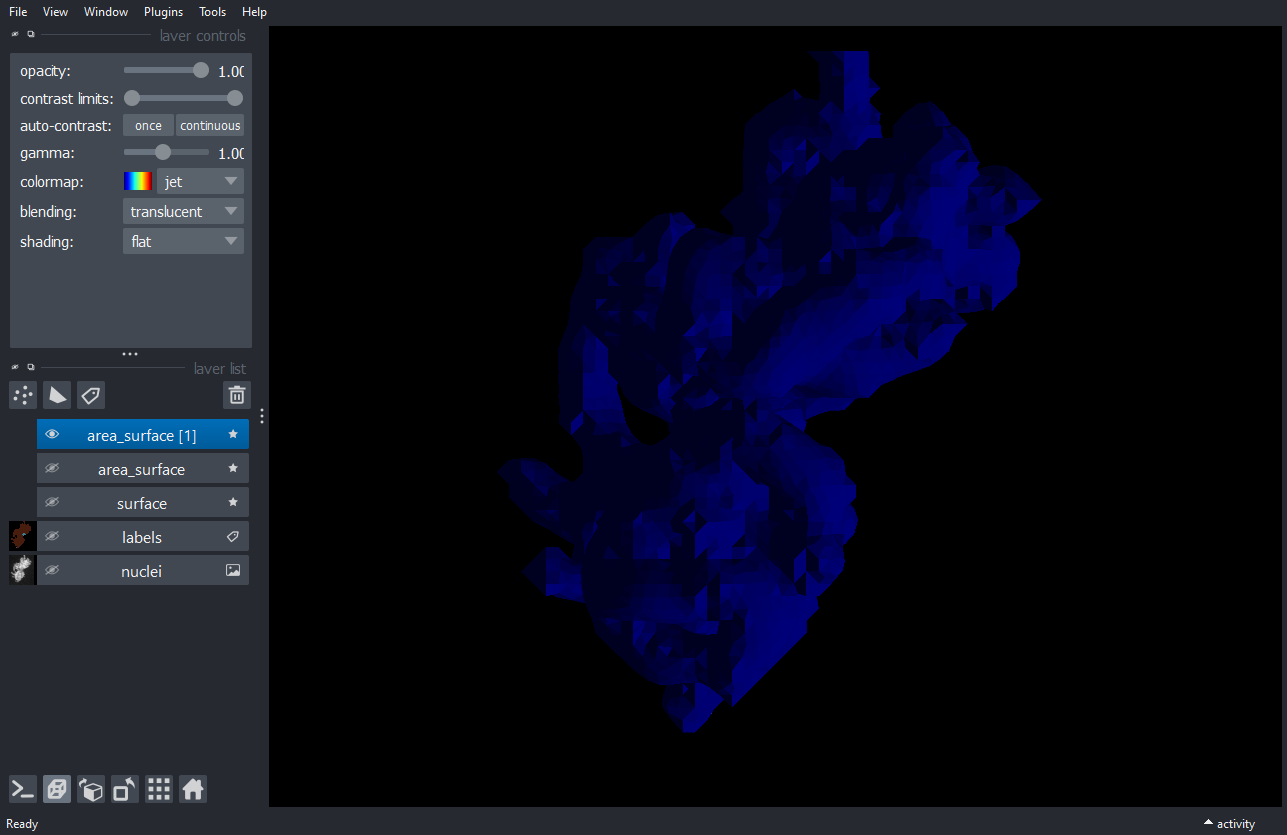

In [8]:
hide_all(viewer)

area_surface = nppas.add_quality(surface, quality_id=nppas.Quality.ASPECT_RATIO)
viewer.add_surface(area_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

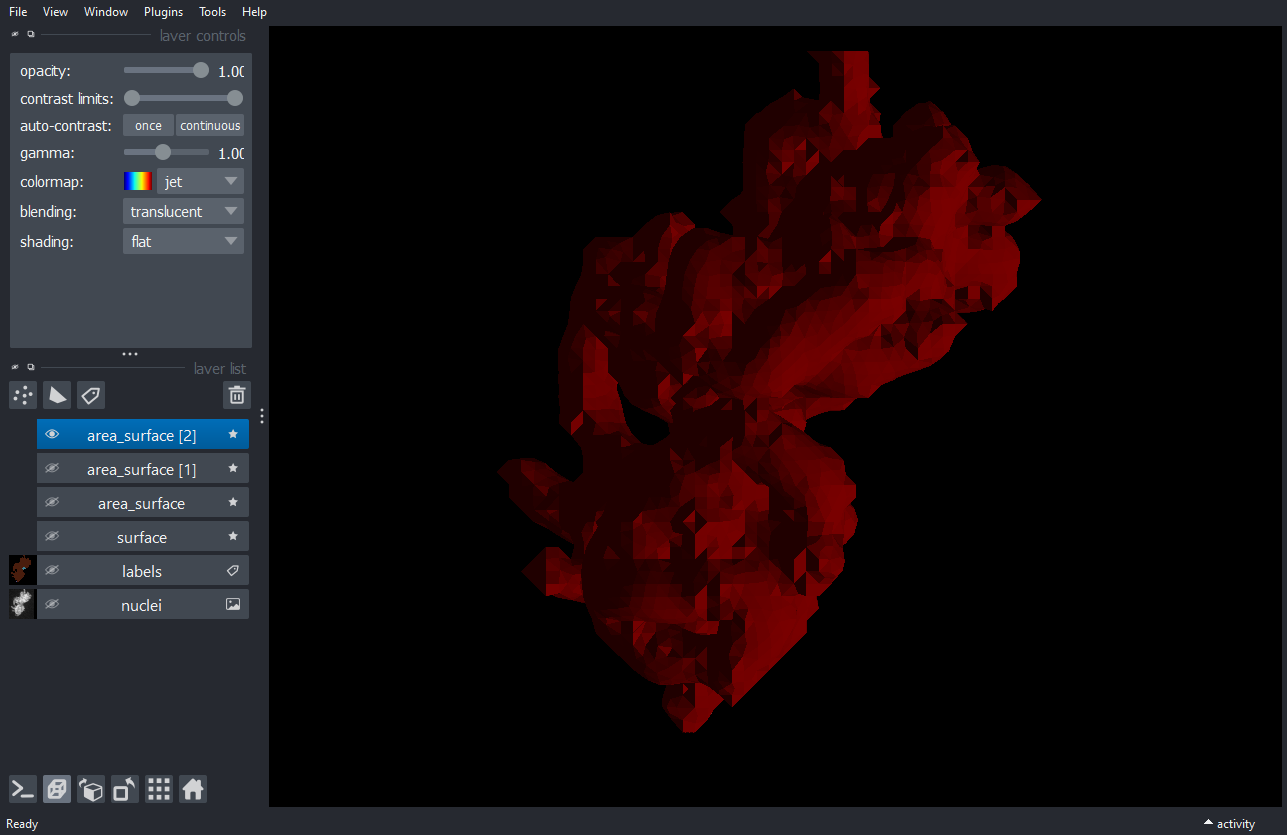

In [9]:
hide_all(viewer)

area_surface = nppas.add_quality(surface, quality_id=nppas.Quality.DISTORTION)
viewer.add_surface(area_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

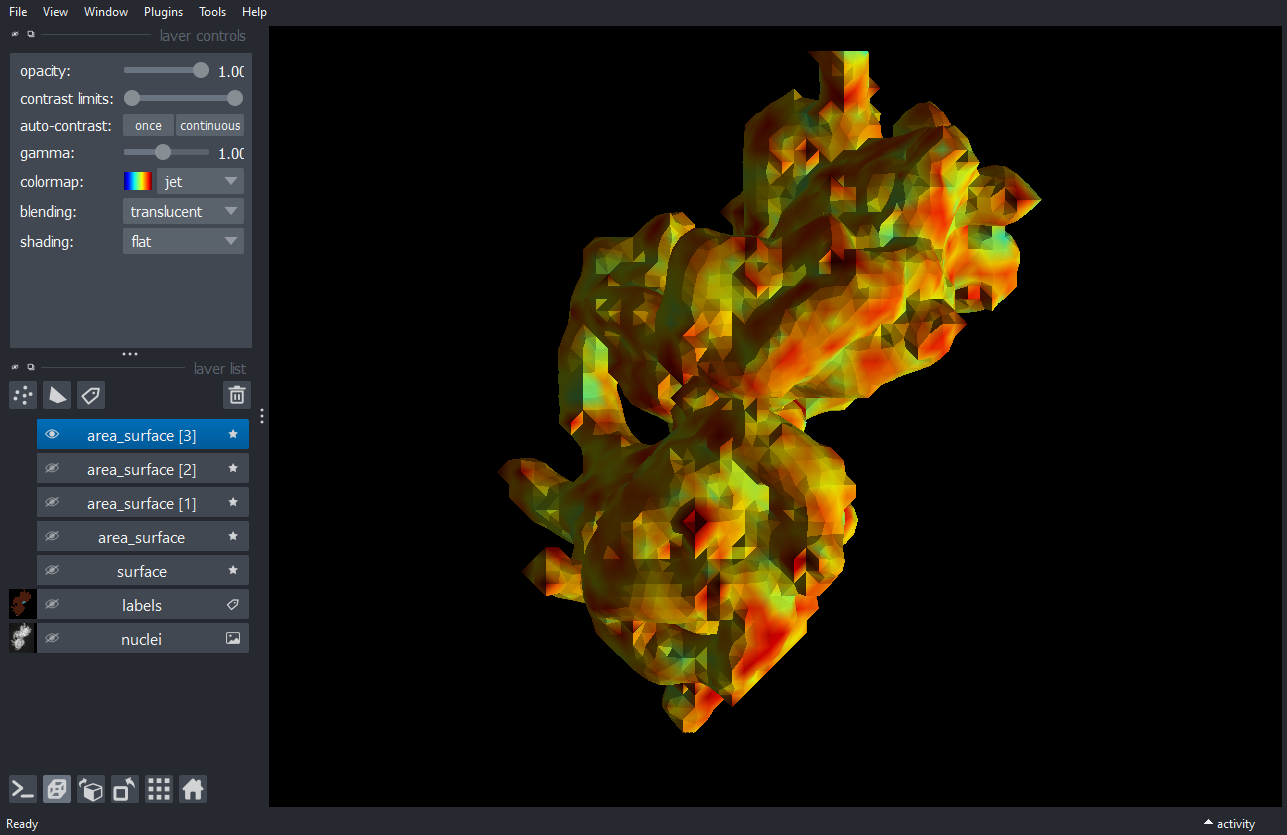

In [10]:
hide_all(viewer)

area_surface = nppas.add_quality(surface, quality_id=nppas.Quality.MIN_ANGLE)
viewer.add_surface(area_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

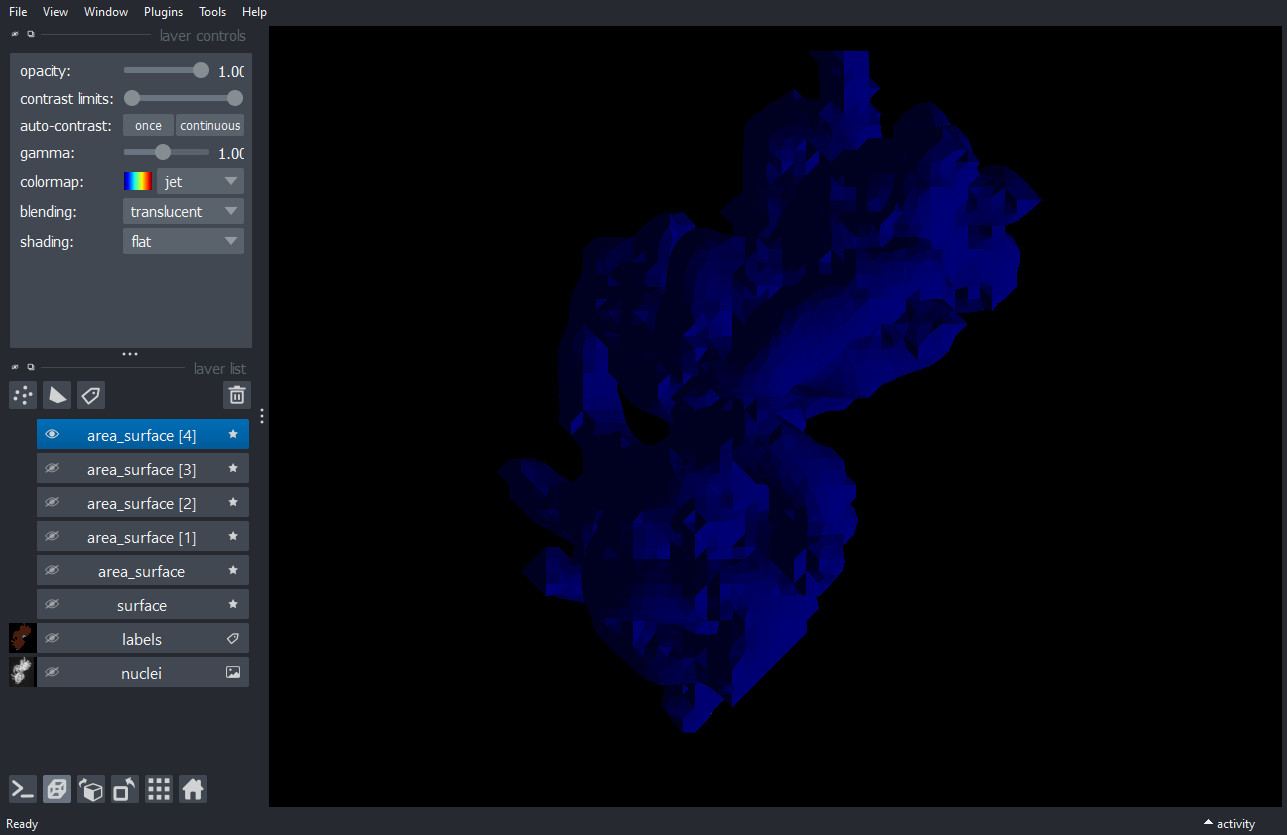

In [11]:
hide_all(viewer)

area_surface = nppas.add_quality(surface, quality_id=nppas.Quality.CONDITION)
viewer.add_surface(area_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

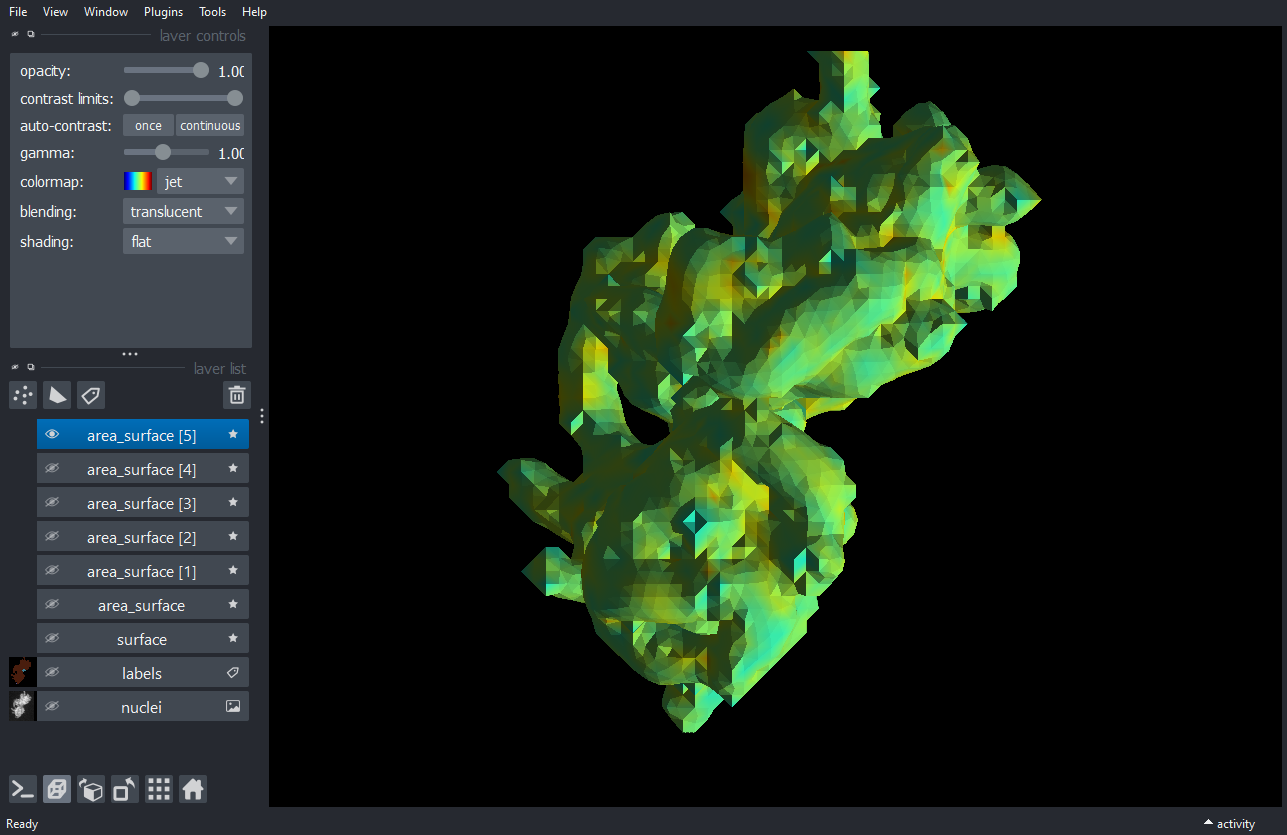

In [12]:
hide_all(viewer)

area_surface = nppas.add_quality(surface, quality_id=nppas.Quality.MAX_ANGLE)
viewer.add_surface(area_surface, colormap='jet')

napari.utils.nbscreenshot(viewer)

## Reading out values
After measurements have been visualized, you can read them out:

In [13]:
vertices, faces, values = viewer.layers[-1].data

table = {
    "X": vertices[:,2],
    "Y": vertices[:,1],
    "Z": vertices[:,0],
    "value":values
}

pd.DataFrame(table)

X          Y          Z      value
0     31.016367  16.975450  19.955576  63.895128
1     29.925572  17.984339  19.764008  68.596342
2     31.016367  17.977788  18.953238  71.431419
3     32.123222  17.965449  20.028878  67.570590
4     27.956891  18.365699  20.196016  72.304534
...         ...        ...        ...        ...
6640  18.121317  33.866808  58.507284  74.269680
6641  12.974281  35.017536  59.046762  67.137927
6642  14.978957  35.017536  59.046762  63.580355
6643  16.983633  35.017536  59.046762  90.000000
6644  15.981295  36.019874  59.046762  80.000000

[6645 rows x 4 columns]

## Other mesh quality measurements
There are more mesh quality measurements available. Not all work on all meshes. Watch out for an error message in a grey window.

In [15]:
for q in nppas.Quality:
    print(q)

Quality.EDGE_RATIO
Quality.ASPECT_RATIO
Quality.RADIUS_RATIO
Quality.ASPECT_FROBENIUS
Quality.MED_ASPECT_FROBENIUS
Quality.MAX_ASPECT_FROBENIUS
Quality.MIN_ANGLE
Quality.COLLAPSE_RATIO
Quality.MAX_ANGLE
Quality.CONDITION
Quality.SCALED_JACOBIAN
Quality.SHEAR
Quality.RELATIVE_SIZE_SQUARED
Quality.SHAPE
Quality.SHAPE_AND_SIZE
Quality.DISTORTION
Quality.MAX_EDGE_RATIO
Quality.SKEW
Quality.TAPER
Quality.VOLUME
Quality.STRETCH
Quality.DIAGONAL
Quality.DIMENSION
Quality.ODDY
Quality.SHEAR_AND_SIZE
Quality.JACOBIAN
Quality.WARPAGE
Quality.ASPECT_GAMMA
Quality.AREA
Quality.ASPECT_BETA
Quality.GAUSS_CURVATURE
Quality.MEAN_CURVATURE
Quality.MAXIMUM_CURVATURE
Quality.MINIMUM_CURVATURE
Quality.SPHERE_FITTED_CURVATURE_1_PERCENT
Quality.SPHERE_FITTED_CURVATURE_2_PERCENT
Quality.SPHERE_FITTED_CURVATURE_5_PERCENT
Quality.SPHERE_FITTED_CURVATURE_10_PERCENT
Quality.SPHERE_FITTED_CURVATURE_25_PERCENT
Quality.SPHERE_FITTED_CURVATURE_50_PERCENT
Quality.SPHERE_FITTED_CURVATURE_MICRO_VOXEL
Quality.SPHERE_FIT

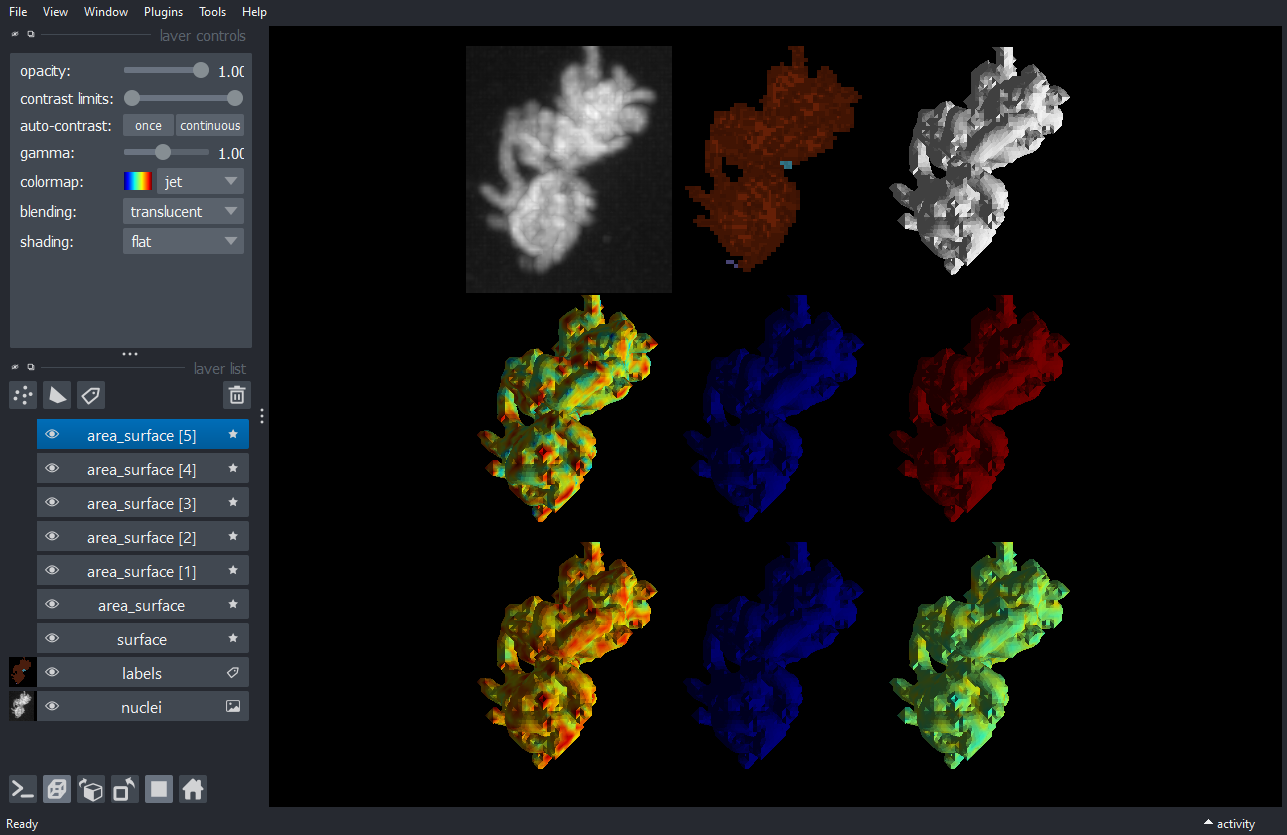

In [16]:
show_all(viewer)
viewer.grid.enabled = True
viewer.grid.stride = -1
napari.utils.nbscreenshot(viewer)